In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:

df = pd.read_csv("train.csv")

In [3]:
df  = df.rename(columns={"fc" : "front_cam" , "blue" : "bluetooth" , "pc" : "primary_cam" , "sc_h" : "screen_h" , "sc_w" : "screen_w"  } , inplace=False)
df

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,screen_h,screen_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
x = df.drop(columns=["price_range" , "three_g" , "m_dep" , "talk_time" ]) 
y = df["price_range"]
# drop  three_g , 
# add 5g also find the dataset or web scape it from ecomm

In [5]:
# generating test data and train data from the input dataset 
x_train , x_test , y_train ,y_test = train_test_split(x , y , test_size=.3, random_state=0)

In [6]:
x_train.shape , y_train.shape

((1400, 17), (1400,))

In [7]:
x_train

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,four_g,int_memory,mobile_wt,n_cores,primary_cam,px_height,px_width,ram,screen_h,screen_w,touch_screen,wifi
1719,833,1,0.6,1,0,1,27,145,4,2,649,1290,586,19,8,0,1
1702,1424,1,2.9,1,0,0,20,180,5,0,181,1199,2658,15,0,0,0
1287,860,1,1.3,1,1,1,49,141,6,13,692,979,3869,16,14,1,1
482,1330,1,1.3,1,14,0,3,83,5,17,980,1262,463,14,6,0,1
768,1149,1,2.2,0,4,0,30,106,6,5,1617,1675,3755,17,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,1224,1,1.6,0,9,0,33,157,1,18,522,563,3796,10,5,1,0
1216,1158,0,0.7,1,1,1,29,123,2,20,311,1796,1542,17,9,0,1
1653,1190,0,2.0,1,0,0,40,93,5,1,1399,1646,3610,13,7,0,1
559,1191,0,2.4,1,2,0,13,169,1,7,179,1813,1028,14,6,1,1


In [8]:

x_train.tail() 

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,four_g,int_memory,mobile_wt,n_cores,primary_cam,px_height,px_width,ram,screen_h,screen_w,touch_screen,wifi
835,1224,1,1.6,0,9,0,33,157,1,18,522,563,3796,10,5,1,0
1216,1158,0,0.7,1,1,1,29,123,2,20,311,1796,1542,17,9,0,1
1653,1190,0,2.0,1,0,0,40,93,5,1,1399,1646,3610,13,7,0,1
559,1191,0,2.4,1,2,0,13,169,1,7,179,1813,1028,14,6,1,1
684,706,0,0.5,0,13,1,31,108,3,19,543,938,2419,8,7,0,1


In [9]:
# checking the null value for each row 
print(x_train.isnull().sum())

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
front_cam        0
four_g           0
int_memory       0
mobile_wt        0
n_cores          0
primary_cam      0
px_height        0
px_width         0
ram              0
screen_h         0
screen_w         0
touch_screen     0
wifi             0
dtype: int64


In [10]:
# clean the x_train data
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1400.0,1234.733571,442.140136,501.0,840.00,1224.0,1610.25,1998.0
bluetooth,1400.0,0.494286,0.500146,0.0,0.00,0.0,1.00,1.0
clock_speed,1400.0,1.550214,0.815758,0.5,0.70,1.5,2.30,3.0
dual_sim,1400.0,0.514286,0.499974,0.0,0.00,1.0,1.00,1.0
front_cam,1400.0,4.202143,4.306668,0.0,1.00,3.0,7.00,19.0
four_g,1400.0,0.523571,0.499623,0.0,0.00,1.0,1.00,1.0
int_memory,1400.0,31.820000,18.373277,2.0,16.00,31.0,48.00,64.0
mobile_wt,1400.0,139.458571,35.323154,80.0,108.00,140.0,169.25,200.0
n_cores,1400.0,4.516429,2.273574,1.0,3.00,4.0,7.00,8.0
primary_cam,1400.0,9.806429,6.058362,0.0,4.75,10.0,15.00,20.0


In [11]:
# checking dublicate values in cols
x_train.T.duplicated()

battery_power    False
bluetooth        False
clock_speed      False
dual_sim         False
front_cam        False
four_g           False
int_memory       False
mobile_wt        False
n_cores          False
primary_cam      False
px_height        False
px_width         False
ram              False
screen_h         False
screen_w         False
touch_screen     False
wifi             False
dtype: bool

In [12]:
# remove the highly corelated data and select 1 
x_train.corr()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,four_g,int_memory,mobile_wt,n_cores,primary_cam,px_height,px_width,ram,screen_h,screen_w,touch_screen,wifi
battery_power,1.000000,0.000030,-0.010393,-0.051675,0.028340,0.016513,-0.003476,0.005362,0.030579,0.018081,0.022486,0.001497,0.000554,-0.034230,-0.032546,0.003498,0.000876
bluetooth,0.000030,1.000000,0.028122,0.028912,0.010658,0.004830,0.038314,-0.028335,0.027427,-0.003314,-0.019314,-0.052209,0.026949,-0.009435,0.007680,0.012712,-0.004074
clock_speed,-0.010393,0.028122,1.000000,-0.008507,0.013528,-0.050346,0.013871,-0.025336,0.016609,-0.010991,-0.041387,-0.026307,0.013294,-0.041102,-0.002016,0.019450,-0.061680
dual_sim,-0.051675,0.028912,-0.008507,1.000000,-0.040680,-0.008503,-0.029678,0.009788,-0.038250,-0.025634,-0.010730,0.039623,0.038192,-0.016581,-0.002518,-0.012496,0.032345
front_cam,0.028340,0.010658,0.013528,-0.040680,1.000000,-0.001386,-0.030199,0.012307,-0.014173,0.636565,-0.027407,-0.019526,0.021029,-0.028940,-0.002720,-0.018810,0.039784
four_g,0.016513,0.004830,-0.050346,-0.008503,-0.001386,1.000000,-0.006468,-0.003165,-0.030546,-0.004513,-0.005930,0.041421,0.003689,0.015336,0.021184,0.037794,-0.009459
int_memory,-0.003476,0.038314,0.013871,-0.029678,-0.030199,-0.006468,1.000000,-0.037143,-0.033912,-0.016489,-0.005104,-0.024616,0.055115,0.024867,-0.002096,-0.046020,0.022742
mobile_wt,0.005362,-0.028335,-0.025336,0.009788,0.012307,-0.003165,-0.037143,1.000000,-0.027926,0.012430,0.009587,0.000498,-0.011638,-0.013025,0.003058,-0.005336,-0.002710
n_cores,0.030579,0.027427,0.016609,-0.038250,-0.014173,-0.030546,-0.033912,-0.027926,1.000000,-0.000314,-0.007281,0.038746,0.019364,-0.009230,0.033757,0.020209,-0.011450
primary_cam,0.018081,-0.003314,-0.010991,-0.025634,0.636565,-0.004513,-0.016489,0.012430,-0.000314,1.000000,-0.037105,-0.021480,0.031840,0.012984,-0.006679,-0.016099,0.033741


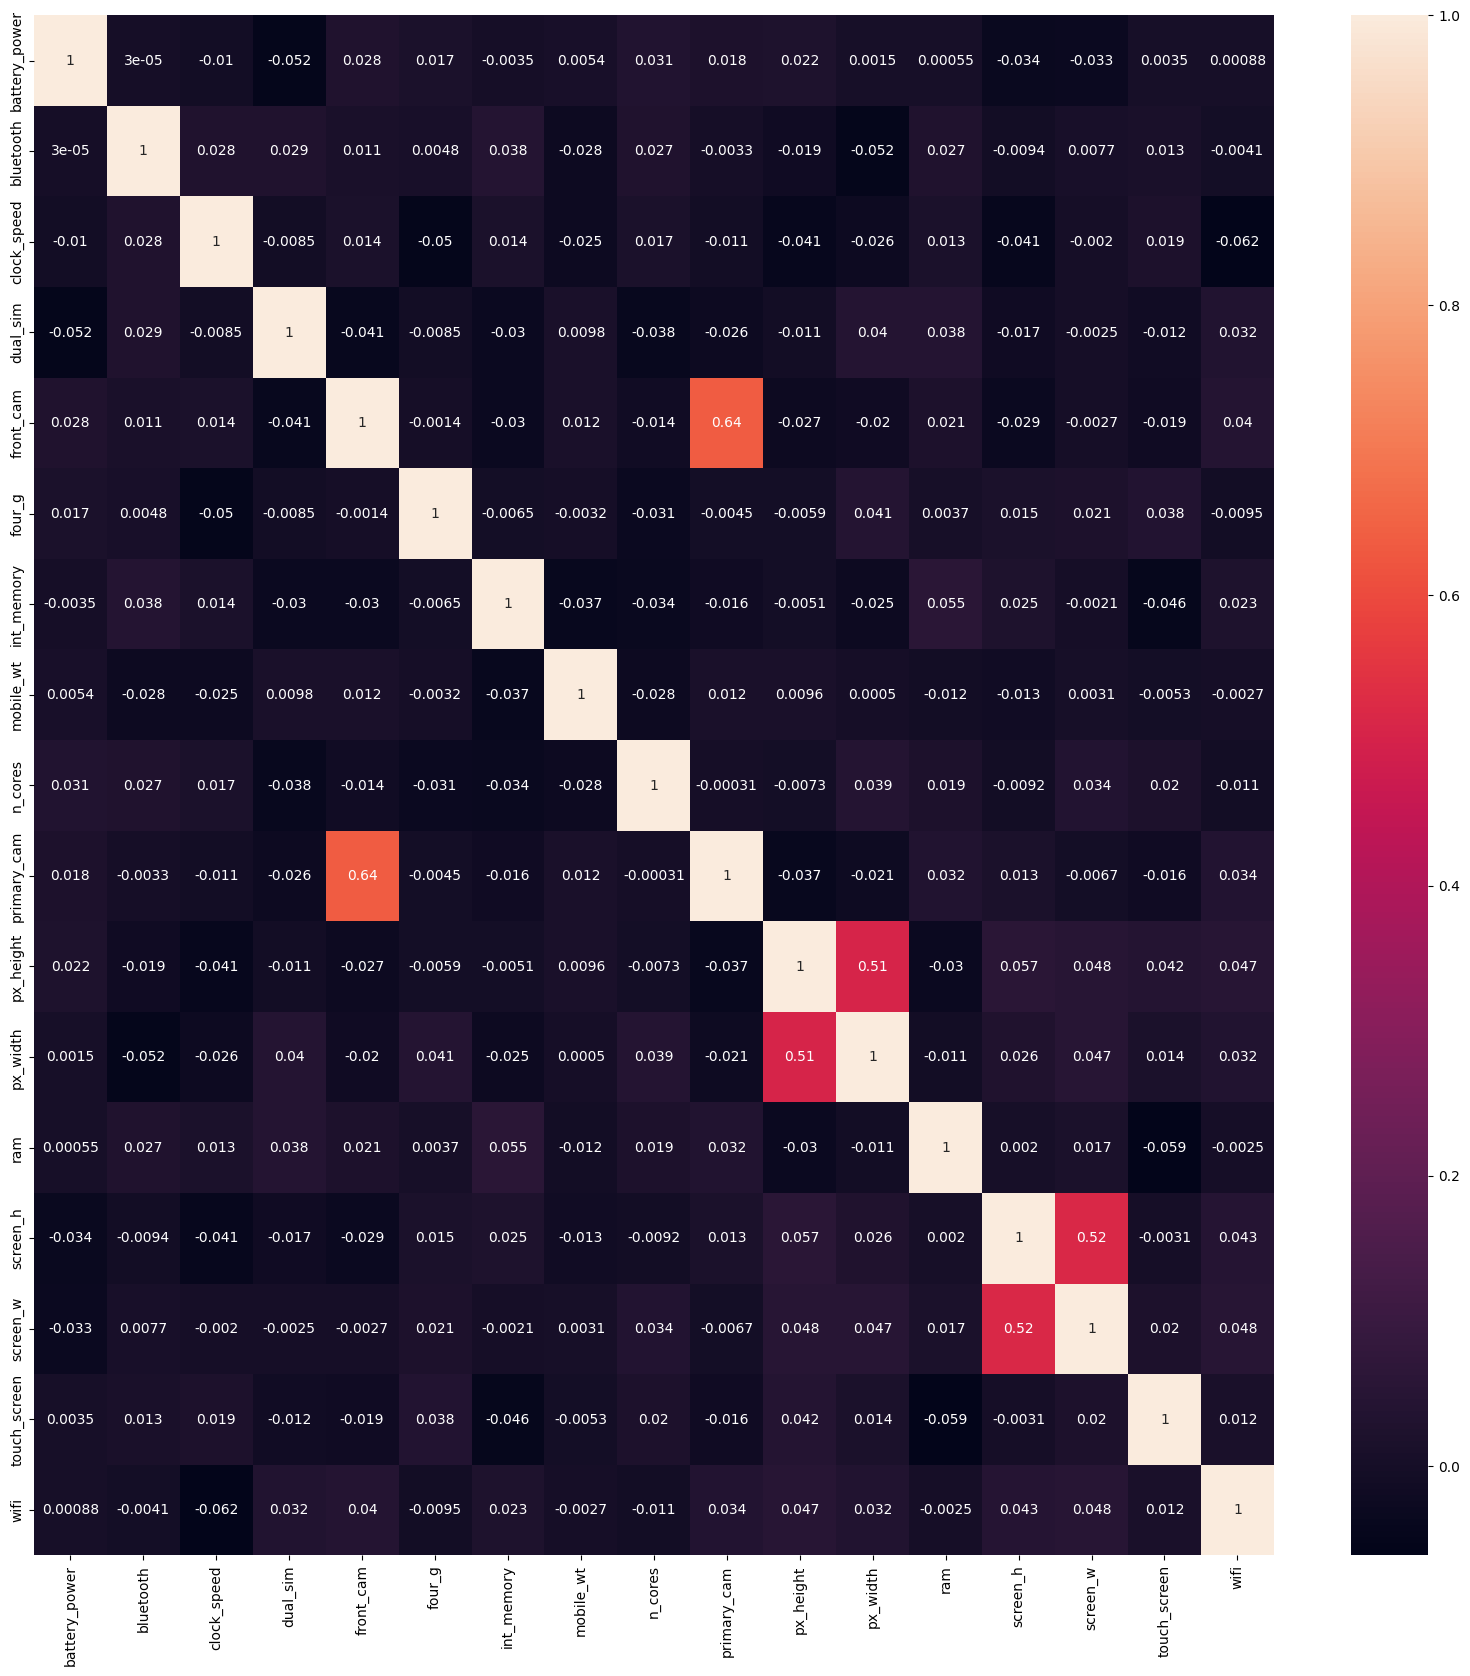

In [13]:
plt.figure(figsize=(20 , 20)) 
cor = x_train.select_dtypes("number").corr()
sns.heatmap(cor, annot=True)
plt.show()

In [14]:
# find out the heavy correlation that affect the model
def correlation(dataset , threshold= .8): 
    col_list = set() 
    corr_dataset = dataset.corr()
    for i in range(len(corr_dataset.columns)): 
        for j in corr_dataset: 
            if (corr_dataset.iloc[i][j]) > threshold and (corr_dataset.iloc[i][j] != 1): 
                col_list.add(corr_dataset.columns[i]) 
    return col_list
x = correlation(x_train , 0.7) 
if(len(x) > 0): 
    print(x) 
else : 
    print("Nothing to drop")

Nothing to drop


In [15]:
# plot histoplot and check the values  
# for i in x_train :
#     sns.histplot(data=df , x=i)
#     plt.show()


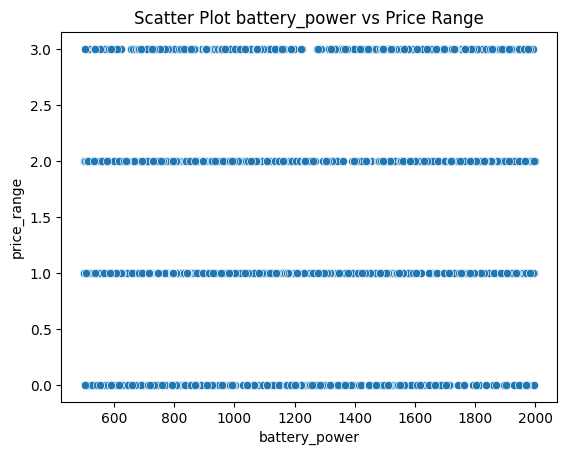

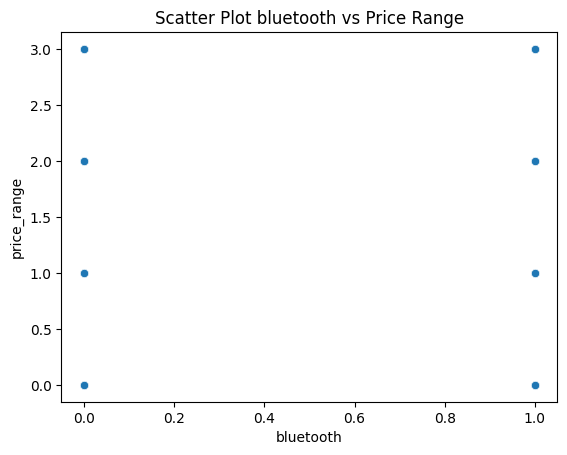

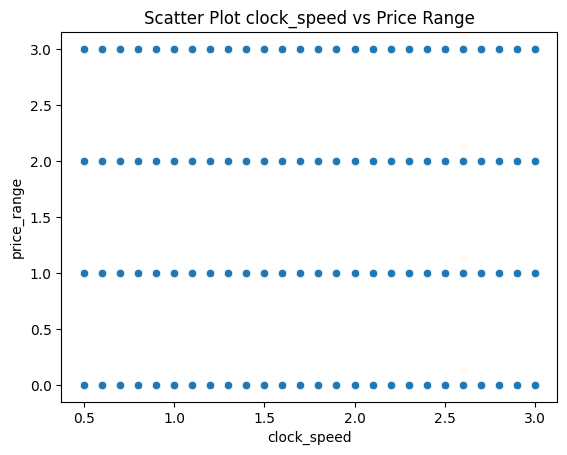

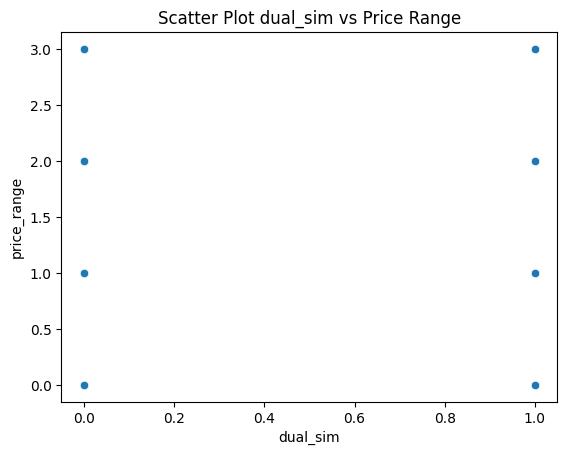

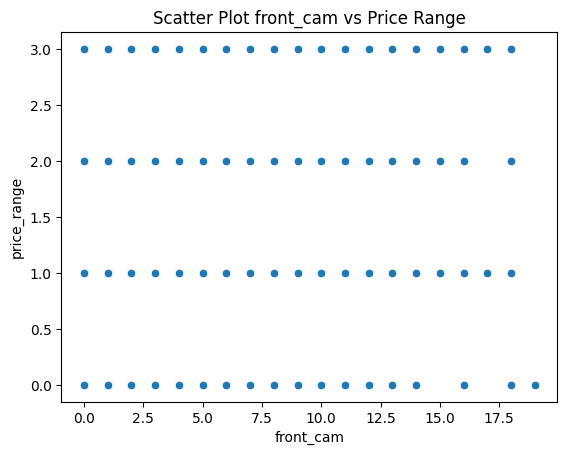

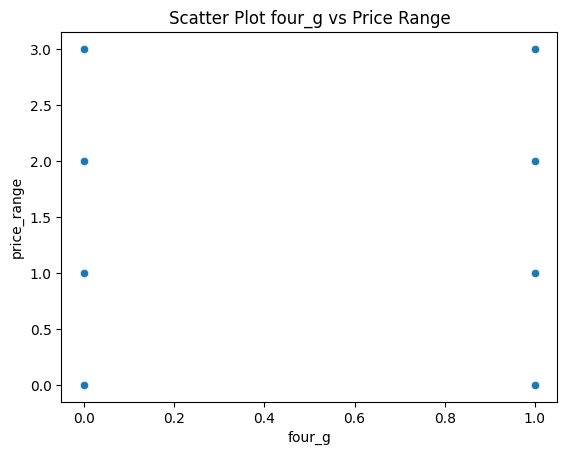

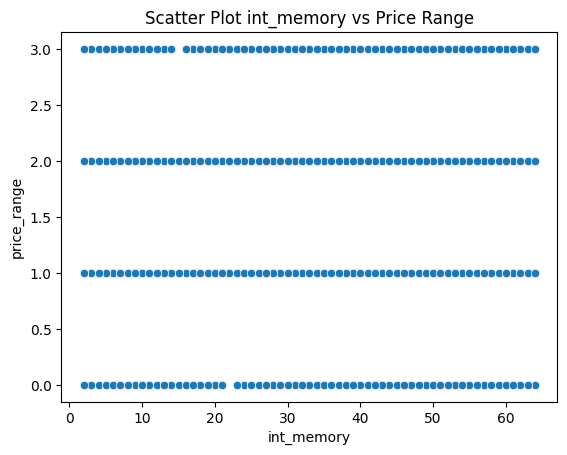

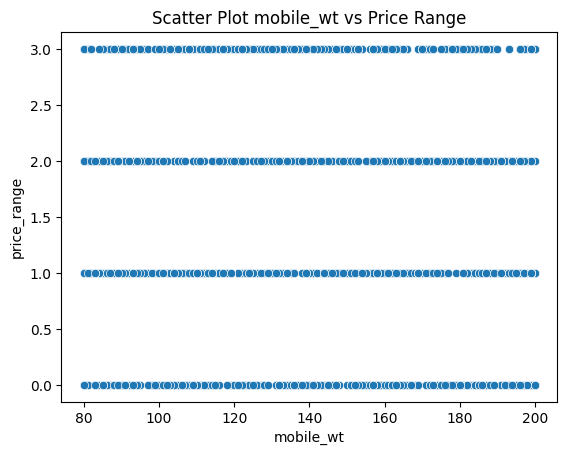

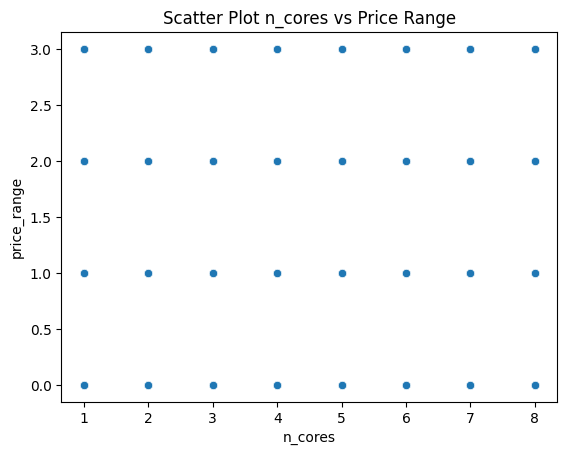

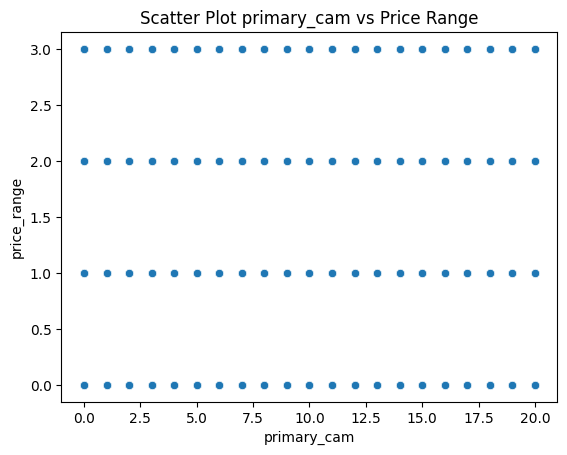

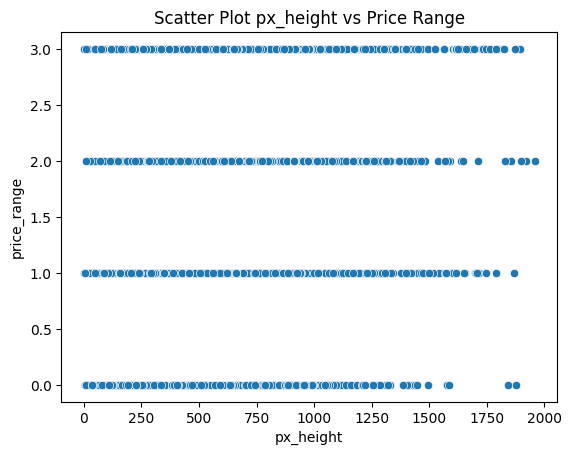

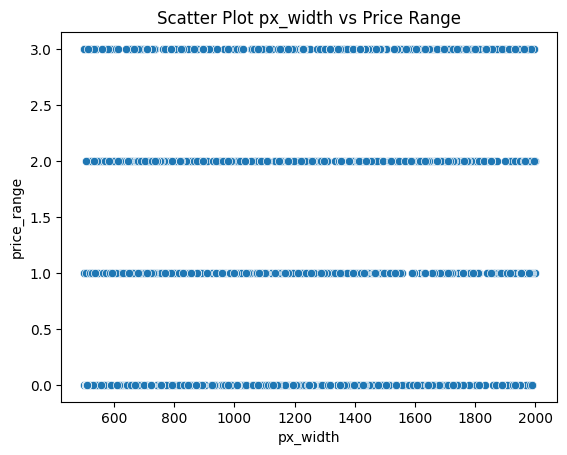

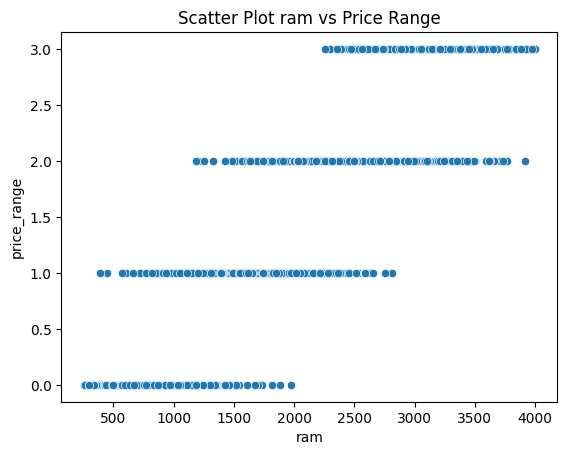

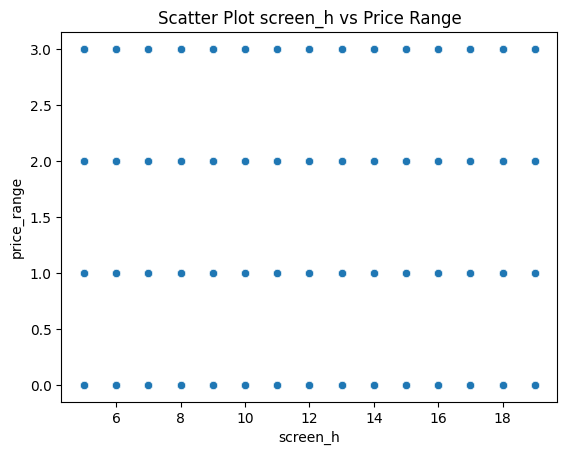

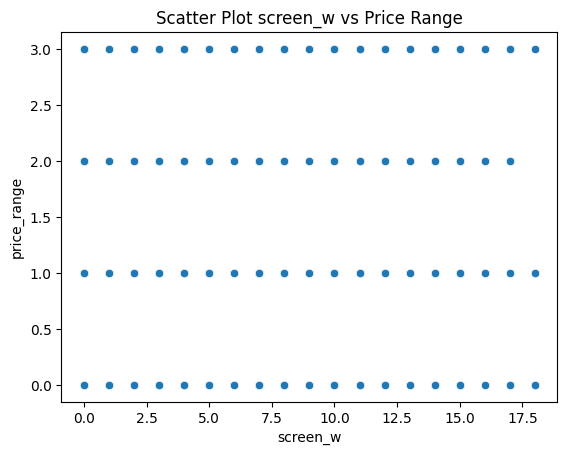

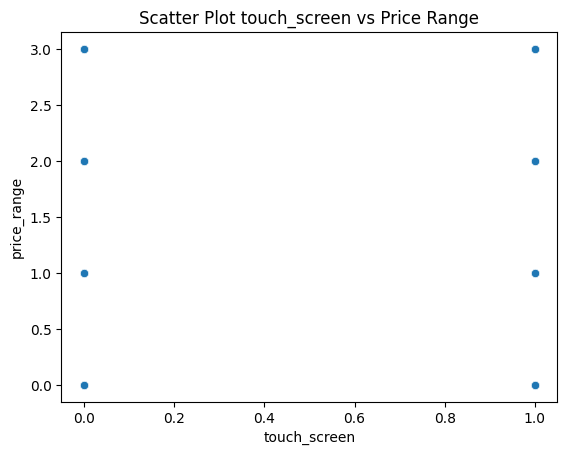

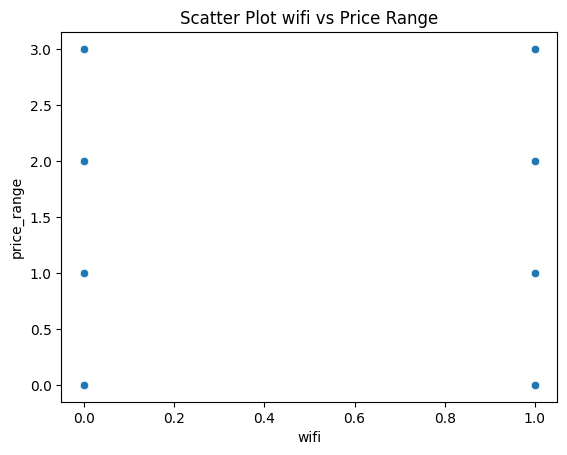

In [16]:
for i in x_train: 
    sns.scatterplot(data=df , x=i , y=y_train)
    plt.title(f'Scatter Plot {i} vs Price Range')
    plt.show()


In [17]:
# wihout scaling applying SVM 
classifier = SVC(kernel="linear") 
# 97.2%
# classifier = SVC(kernel="poly")
# 96% 
# classifier =SVC(kernel="rbf")
# 95.4%
classifier.fit(x_train , y_train)
y_pred = classifier.predict(x_test) 
accuracy_score(y_test, y_pred) 

0.975

In [18]:
# after scaling down applying SVM
scaler  = StandardScaler() 
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.fit_transform(x_test) 
classifier.fit(x_train_scaled , y_train) 
y_pred = classifier.predict(x_test_scaled)
accuracy_score(y_test , y_pred)


0.9333333333333333

In [19]:
from sklearn.neighbors import KNeighborsClassifier 
def findMaxAccuracy(k):
    knn_classifier = KNeighborsClassifier(n_neighbors=k) 
    knn_classifier.fit(x_train , y_train) 
    y_pred = knn_classifier.predict(x_test) 
    return accuracy_score(y_test , y_pred) 
maxi = 0 
ind = None 
for i in range(1 ,200) : 
    if(maxi < findMaxAccuracy(i)) : 
        maxi = findMaxAccuracy(i) 
        ind = i 
print("maximum acc= " , maxi  , " at value k= ", ind)
# at k = 12 it is .95%


maximum acc=  0.9466666666666667  at value k=  18


In [20]:
# Scaled the input data applying KNN 
# it is giving me the highest accuracy in knn when changing the split data set to .5
scaler  = StandardScaler() 
def findMaxAccuracy_scaled(k): 
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train_scaled , y_train) 
    y_pred = classifier.predict(x_test_scaled)
    return accuracy_score(y_test , y_pred)

maxi =0
ind = None 
for i in range(1 , 200) : 
    accuracy = findMaxAccuracy_scaled(i)
    if(maxi < accuracy) : 
        maxi = accuracy 
        ind = i  
print("maximum=" , maxi , "at value k=" , ind)  

maximum= 0.9333333333333333 at value k= 1


In [21]:
from sklearn.tree import DecisionTreeClassifier 
def findMaxAccuracy(i):
    decision_tree = DecisionTreeClassifier(max_depth=i)
    decision_tree.fit(x_train ,y_train) 
    y_pred = decision_tree.predict(x_test) 
    return accuracy_score(y_test , y_pred) 
maxi = 0
for i in range(1 , 1000): 
    accuracy = findMaxAccuracy(i) 
    if(maxi < accuracy) : 
        maxi = accuracy 
        ind = i  
print("accuracy " , maxi , "at depth " , ind)

accuracy  0.855 at depth  979


In [22]:
import tensorflow as tf 
import keras 
from keras.layers import LSTM , Dense  
x_train.shape


(1400, 17)

In [23]:
model  = keras.Sequential( 
    [LSTM(units=17 , input_shape=(17,1)) , 
    Dense(units=8 , activation="relu"), 
    Dense(units=4 , activation="relu"), 
    Dense(units=1, activation="softmax"),
    ]
)

C:\Users\coder\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(loss="categorical_crossentropy" , optimizer="adam" , metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 17)             │         1,292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,477 (5.77 KB)

 Trainable params: 1,477 (5.77 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:

model.fit(x_train , y_train , epochs=5 , batch_size=10 ) 

Epoch 1/5


C:\Users\coder\AppData\Roaming\Python\Python312\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (10, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\coder\AppData\Roaming\Python\Python312\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(10, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2761 - loss: 0.0000e+00
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2375 - loss: 0.0000e+00
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2688 - loss: 0.0000e+00
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2544 - loss: 0.0000e+00
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2562 - loss: 0.0000e+00


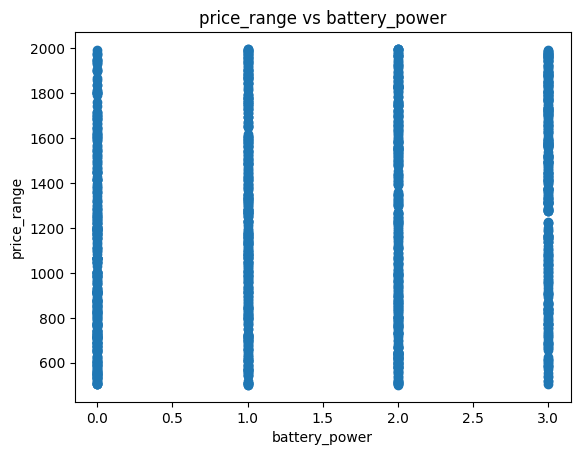

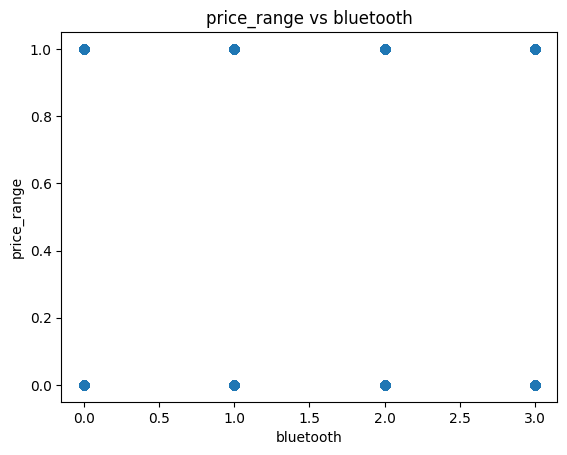

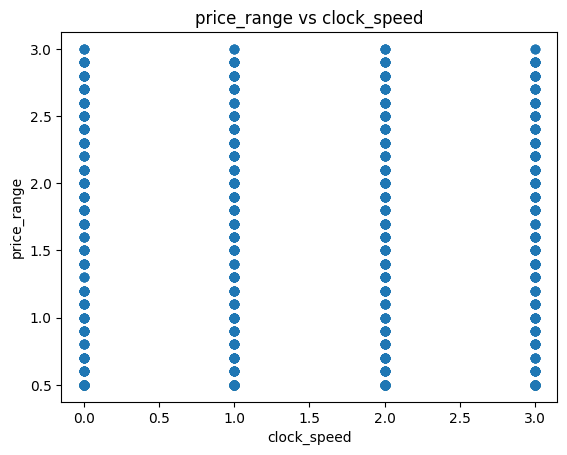

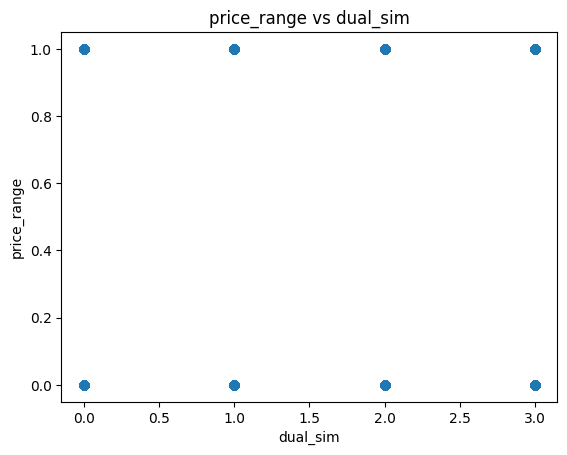

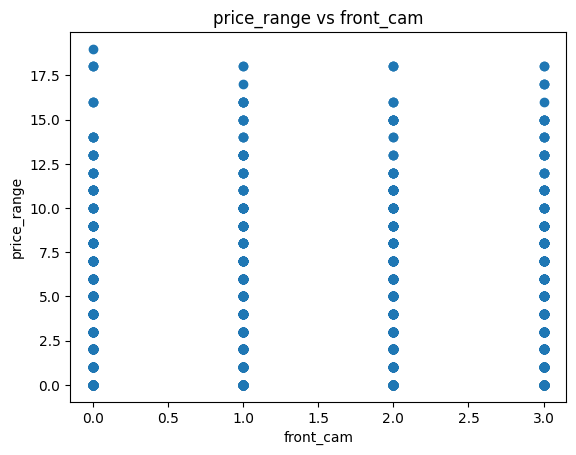

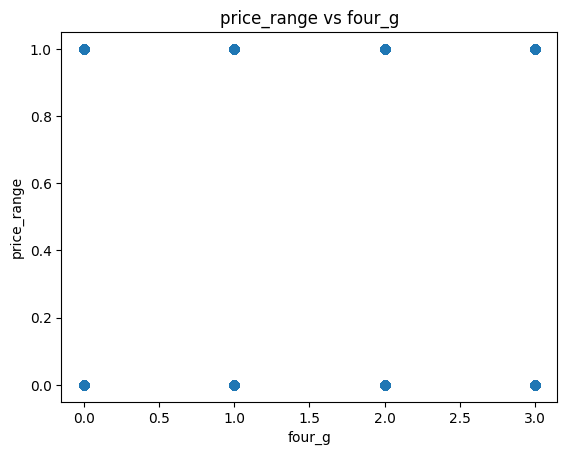

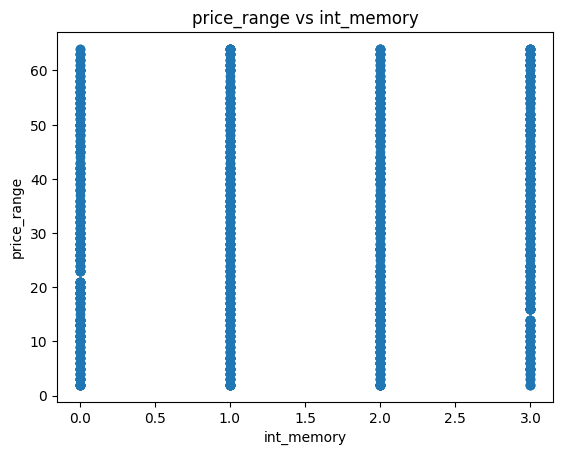

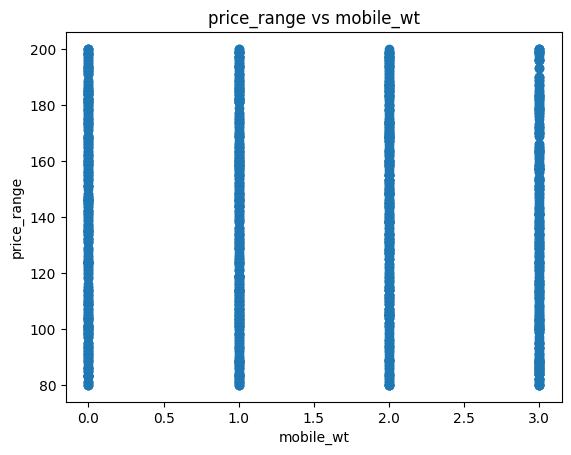

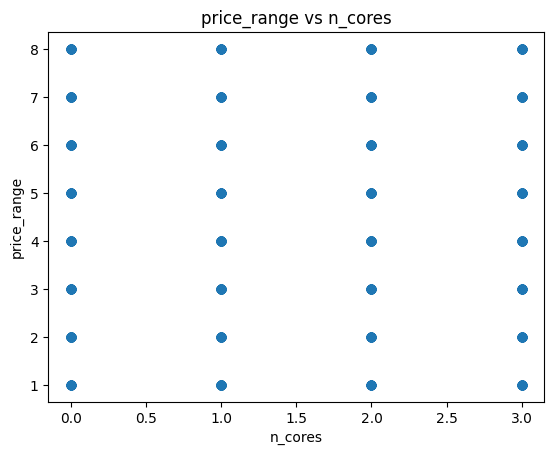

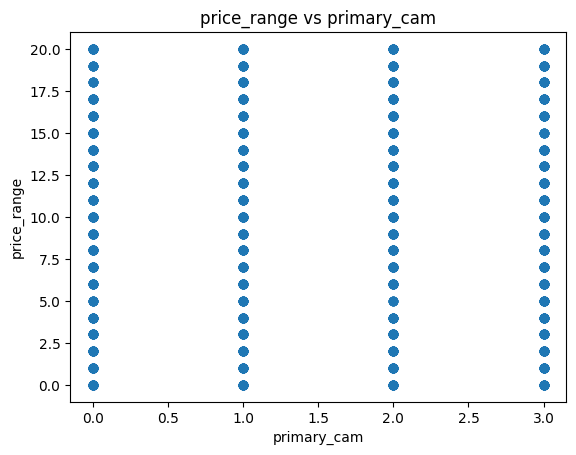

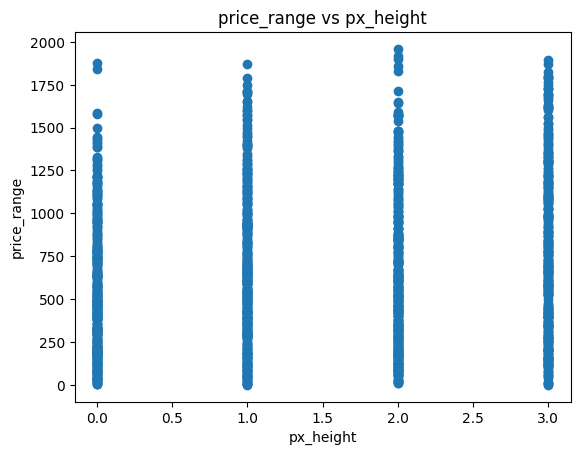

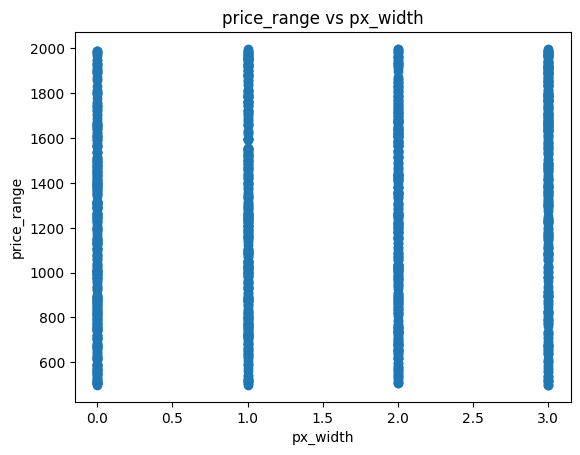

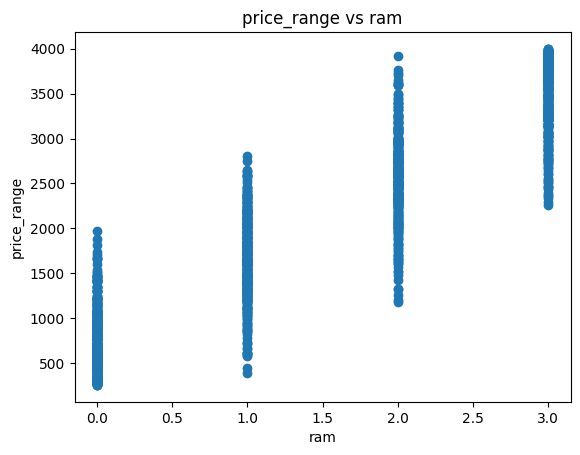

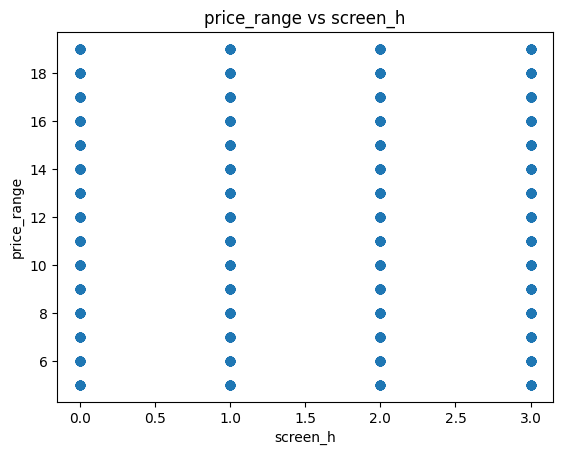

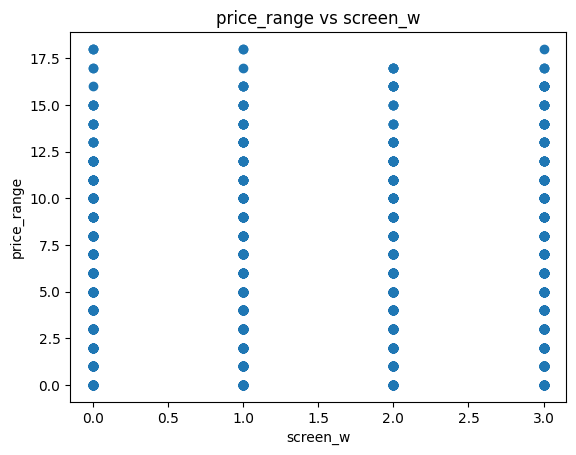

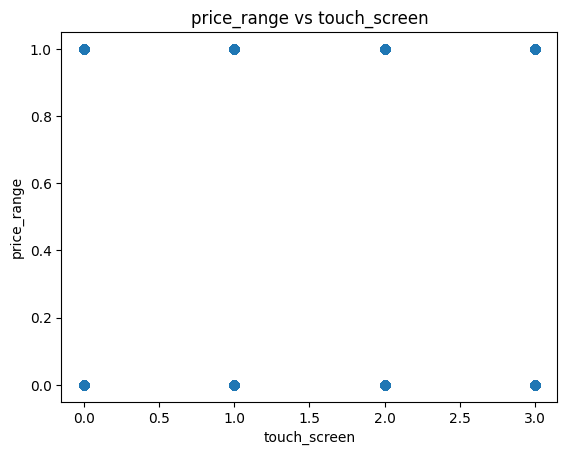

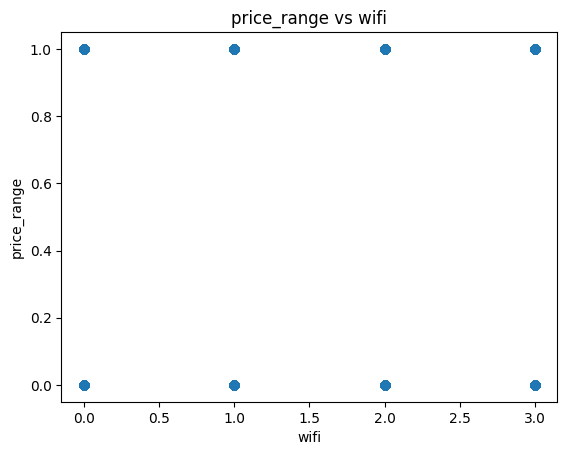

In [26]:

for i in x_train: 
    plt.scatter(y_train , x_train[i])
    plt.title("price_range vs " +i)
    plt.ylabel("price_range") 
    plt.xlabel(i)
    plt.show()